In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:

data = pd.read_csv('ml_data_variable.csv')

# extract the independent variables (X) and dependent variable (y)
X = data[['COAL, Thousand Short Tons', 'NATURALGAS, Billion Cubic Feet', 'ELECTRICITY, Million Kilowatthours',
         'PETRO_INDUSTRIAL, Thousand Barrels per Day', 'PETRO_RESIDENTIAL_COMMERCIAL, Thousand Barrels per Day',
         'PETRO_TRANSPORTATION_ELECTRICPOWER, Thousand Barrels per Day']]
y = data['CO2, Million Metric Tons']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


R² Score: 0.33405134356056243
Mean Absolute Error: 30.40545033241576
Mean Squared Error: 1406.1025514679277
Root Mean Squared Error: 37.49803396803528


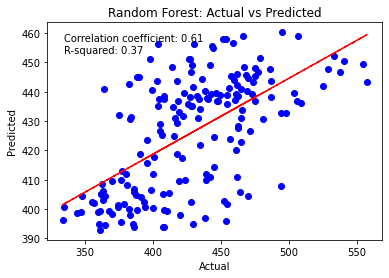

In [7]:

# Create and train the SVM regressor
svm_regressor = svm.SVR()
svm_regressor.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = svm_regressor.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print results

print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Calculate statistical parameters
correlation = np.corrcoef(y_test, y_pred)[0, 1]
r_squared = np.square(correlation)

# Fit a linear regression line
trendline = np.polyfit(y_test, y_pred, 1)
trendline_fn = np.poly1d(trendline)

# Plot Actual vs Predicted values with trend line
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, trendline_fn(y_test), color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Support Vector Machine,SVM: Actual vs Predicted')

# Annotate statistical parameters on the plot
textstr = f'Correlation coefficient: {correlation:.2f}\nR-squared: {r_squared:.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top')

plt.show()

'''
Overfitting: SVM models are prone to overfitting, especially when the data is noisy or when the number of features is high compared to the number of samples. Overfitting can lead to poor generalization and low R2 values. Regularization techniques such as adjusting the regularization parameter (C) or using techniques like cross-validation can help mitigate overfitting.

Incorrect Model Parameters: The performance of an SVM model can be sensitive to the choice of hyperparameters such as the kernel type, regularization parameter (C), and kernel coefficient (gamma). Suboptimal parameter settings can result in poor model performance and low R2 values. It is important to carefully tune the hyperparameters to find the optimal configuration for your data.

Outliers or Noise: Outliers or noisy data points can adversely affect the performance of an SVM model. Consider identifying and handling outliers appropriately, either by removing them or applying outlier treatment techniques, to improve the R2 value.

Insufficient Data: SVM models may require a relatively large amount of data to generalize well. If you have a small dataset, the model may struggle to capture the underlying patterns accurately. Gathering more data or using techniques such as data augmentation can help address this issue.

Data Scaling: SVM models are sensitive to the scale of the features. If the features have different scales, it can impact the model's performance and R2 value. Consider applying feature scaling techniques, such as standardization or normalization, to ensure that all features are on a similar scale.

'''